The purpose of this notebook is to select dates for which to load in the TREx images. These are determined by using certain GM activity parameters from the OMNIWeb database. Using the 1 HR resolution data, looking at KP*10 Index, AE Index, DsT Index and Scalar B (IMF components, Bx,By,Bz). 

Kp*10: Tells us the overall level of Geomagnetic Activity
AE: Auroral Electrojet presence (global, quantitative measure of auroral zone magnetic activity)
DsT Index: Disturbance Storm Time index (measure of the strength of the Earth's ring current)
Scalar B: Measure of IMF. Typically, we use changes in Bz to help with auroral forecasting. Scalar B is a representation of the magnetic field overall.

In [1]:
%matplotlib inline  
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os
import sys
from matplotlib.lines import Line2D

In [2]:
column_names = ['Year', 'DOY', 'Hour','Scalar B, nT','Kp*10 index','Dst-index, nT','AE-index, nT']    
omni_hr = pd.read_csv('omni_aurora.txt', sep = r'\s+', names = column_names, header = None)

In [3]:
omni_hr

,Year,DOY,Hour,"Scalar B, nT",Kp*10 index,"Dst-index, nT","AE-index, nT"
0,2023,213,0,5.2,20,-12,326
1,2023,213,1,5.3,20,-11,346
2,2023,213,2,5.3,20,-9,261
3,2023,213,3,3.6,17,-5,156
4,2023,213,4,2.2,17,-1,58
...,...,...,...,...,...,...,...
20683,2025,343,19,999.9,13,-10,9999
20684,2025,343,20,999.9,13,-13,9999
20685,2025,343,21,999.9,13,-13,9999
20686,2025,343,22,999.9,13,-11,9999


In [4]:
omni_hr['Year'] = omni_hr['Year'].astype(int)
omni_hr['DOY'] = omni_hr['DOY'].astype(int)
omni_hr['Hour'] = omni_hr['Hour'].astype(int)

# Create TimeStamps column 
omni_hr['TimeStamps'] = pd.to_datetime(
    omni_hr['Year'].astype(str) + omni_hr['DOY'].astype(str).str.zfill(3), 
    format='%Y%j', errors='coerce'   # errors='coerce' will set invalid dates to NaT
) + pd.to_timedelta(omni_hr['Hour'], unit='h')

# Convert Kp*10 index to Kp index
omni_hr['Kp Index'] = omni_hr['Kp*10 index'] / 10

# Map Kp index to color
def kp_to_color(kp):
    if kp < 5:
        return 'green'
    elif kp < 6:
        return 'yellow'
    elif kp < 7:
        return '#CCCC00'  
    elif kp < 8:
        return 'orange'
    elif kp < 9:  # G4
        return 'red'
    elif kp == 9.0:  # G5
        return '#8B0000'  
    else:
        return 'gray'  # fallback color

omni_hr['Color'] = omni_hr['Kp Index'].apply(kp_to_color)

# Clean invalid values
omni_hr['Scalar B, nT'] = omni_hr['Scalar B, nT'].replace(9.999e+02, np.nan)
omni_hr['Dst-index, nT'] = omni_hr['Dst-index, nT'].replace(9999, np.nan)
omni_hr['Dst-index, nT'] = omni_hr['Dst-index, nT'].replace(9.999e+02, np.nan)
omni_hr['AE-index, nT'] = omni_hr['AE-index, nT'].replace(9999, np.nan)

omni_hr


,Year,DOY,Hour,"Scalar B, nT",Kp*10 index,"Dst-index, nT","AE-index, nT",TimeStamps,Kp Index,Color
0,2023,213,0,5.2,20,-12,326.0,2023-08-01 00:00:00,2.0,green
1,2023,213,1,5.3,20,-11,346.0,2023-08-01 01:00:00,2.0,green
2,2023,213,2,5.3,20,-9,261.0,2023-08-01 02:00:00,2.0,green
3,2023,213,3,3.6,17,-5,156.0,2023-08-01 03:00:00,1.7,green
4,2023,213,4,2.2,17,-1,58.0,2023-08-01 04:00:00,1.7,green
...,...,...,...,...,...,...,...,...,...,...
20683,2025,343,19,NaN,13,-10,NaN,2025-12-09 19:00:00,1.3,green
20684,2025,343,20,NaN,13,-13,NaN,2025-12-09 20:00:00,1.3,green
20685,2025,343,21,NaN,13,-13,NaN,2025-12-09 21:00:00,1.3,green
20686,2025,343,22,NaN,13,-11,NaN,2025-12-09 22:00:00,1.3,green


In [41]:
df_full["TimeStamps"] = pd.to_datetime(df_full["TimeStamps"], utc=True)
df_full["sunrise_utc"] = pd.to_datetime(df_full["sunrise_utc"], utc=True)
df_full["sunset_utc"] = pd.to_datetime(df_full["sunset_utc"], utc=True)
df_full

,Year,DOY,Hour,"Scalar B, nT",Kp*10 index,"Dst-index, nT","AE-index, nT",TimeStamps,Kp Index,Color,date,sunrise_utc,sunset_utc,always_dark,always_light
0,2023,213,0,5.2,20,-12,326.0,2023-08-01 00:00:00+00:00,2.0,green,2023-08-01,2023-08-01 10:58:20.388407+00:00,2023-08-01 04:29:41.841293+00:00,False,False
1,2023,213,1,5.3,20,-11,346.0,2023-08-01 01:00:00+00:00,2.0,green,2023-08-01,2023-08-01 10:58:20.388407+00:00,2023-08-01 04:29:41.841293+00:00,False,False
2,2023,213,2,5.3,20,-9,261.0,2023-08-01 02:00:00+00:00,2.0,green,2023-08-01,2023-08-01 10:58:20.388407+00:00,2023-08-01 04:29:41.841293+00:00,False,False
3,2023,213,3,3.6,17,-5,156.0,2023-08-01 03:00:00+00:00,1.7,green,2023-08-01,2023-08-01 10:58:20.388407+00:00,2023-08-01 04:29:41.841293+00:00,False,False
4,2023,213,4,2.2,17,-1,58.0,2023-08-01 04:00:00+00:00,1.7,green,2023-08-01,2023-08-01 10:58:20.388407+00:00,2023-08-01 04:29:41.841293+00:00,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20683,2025,343,19,NaN,13,-10,NaN,2025-12-09 19:00:00+00:00,1.3,green,2025-12-09,2025-12-09 16:52:58.672116+00:00,2025-12-09 22:06:20.720788+00:00,False,False
20684,2025,343,20,NaN,13,-13,NaN,2025-12-09 20:00:00+00:00,1.3,green,2025-12-09,2025-12-09 16:52:58.672116+00:00,2025-12-09 22:06:20.720788+00:00,False,False
20685,2025,343,21,NaN,13,-13,NaN,2025-12-09 21:00:00+00:00,1.3,green,2025-12-09,2025-12-09 16:52:58.672116+00:00,2025-12-09 22:06:20.720788+00:00,False,False
20686,2025,343,22,NaN,13,-11,NaN,2025-12-09 22:00:00+00:00,1.3,green,2025-12-09,2025-12-09 16:52:58.672116+00:00,2025-12-09 22:06:20.720788+00:00,False,False


In [50]:
def is_dark_ts(ts):
    observer.date = ts
    sun = ephem.Sun(observer)
    return sun.alt < ephem.degrees('-12')
df_full["is_dark"] = df_full["TimeStamps"].apply(is_dark_ts)
df_full

,Year,DOY,Hour,"Scalar B, nT",Kp*10 index,"Dst-index, nT","AE-index, nT",TimeStamps,Kp Index,Color,date,sunrise_utc,sunset_utc,always_dark,always_light,is_dark
0,2023,213,0,5.2,20,-12,326.0,2023-08-01 00:00:00+00:00,2.0,green,2023-08-01,2023-08-01 10:58:20.388407+00:00,2023-08-01 04:29:41.841293+00:00,False,False,False
1,2023,213,1,5.3,20,-11,346.0,2023-08-01 01:00:00+00:00,2.0,green,2023-08-01,2023-08-01 10:58:20.388407+00:00,2023-08-01 04:29:41.841293+00:00,False,False,False
2,2023,213,2,5.3,20,-9,261.0,2023-08-01 02:00:00+00:00,2.0,green,2023-08-01,2023-08-01 10:58:20.388407+00:00,2023-08-01 04:29:41.841293+00:00,False,False,False
3,2023,213,3,3.6,17,-5,156.0,2023-08-01 03:00:00+00:00,1.7,green,2023-08-01,2023-08-01 10:58:20.388407+00:00,2023-08-01 04:29:41.841293+00:00,False,False,False
4,2023,213,4,2.2,17,-1,58.0,2023-08-01 04:00:00+00:00,1.7,green,2023-08-01,2023-08-01 10:58:20.388407+00:00,2023-08-01 04:29:41.841293+00:00,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20683,2025,343,19,NaN,13,-10,NaN,2025-12-09 19:00:00+00:00,1.3,green,2025-12-09,2025-12-09 16:52:58.672116+00:00,2025-12-09 22:06:20.720788+00:00,False,False,False
20684,2025,343,20,NaN,13,-13,NaN,2025-12-09 20:00:00+00:00,1.3,green,2025-12-09,2025-12-09 16:52:58.672116+00:00,2025-12-09 22:06:20.720788+00:00,False,False,False
20685,2025,343,21,NaN,13,-13,NaN,2025-12-09 21:00:00+00:00,1.3,green,2025-12-09,2025-12-09 16:52:58.672116+00:00,2025-12-09 22:06:20.720788+00:00,False,False,False
20686,2025,343,22,NaN,13,-11,NaN,2025-12-09 22:00:00+00:00,1.3,green,2025-12-09,2025-12-09 16:52:58.672116+00:00,2025-12-09 22:06:20.720788+00:00,False,False,False


In [51]:
def GMActivity_range(omni_data, start_dt, end_dt, x_tick_vals, x_tick_labels, save_fig_str):
    """
    Visualizes geomagnetic activity over an arbitrary datetime range 
    (works for multi-year spans, e.g. 2023–2025).

    Parameters:
    ----------
    omni_data : pandas.DataFrame
        Must contain:
        'TimeStamps', 'Kp Index', 'Color', 
        'AE-index, nT', 'Dst-index, nT', 'Scalar B, nT'

    start_dt : str or datetime
        Start datetime (inclusive)

    end_dt : str or datetime
        End datetime (exclusive)

    x_tick_vals : list of datetime
        X-axis ticks

    x_tick_labels : list of str
        Labels for ticks

    save_fig_str : str or empty
        Path to save figure, or '' to skip saving.
    """

    # Convert to datetime if strings
    start_dt = pd.to_datetime(start_dt)
    end_dt   = pd.to_datetime(end_dt)

    # Filter full dataset by timestamp range
    mnths = omni_data[
        (omni_data["TimeStamps"] >= start_dt) &
        (omni_data["TimeStamps"] <  end_dt)
    ].copy()

    # Clean inf values
    mnths = mnths.replace([np.inf, -np.inf], np.nan)

    # Initialize Figure
    fig, ax = plt.subplots(nrows=4, ncols=1, figsize=(16, 15), sharex=True)

    # 1: KP Index
    ax[0].bar(
        x=mnths['TimeStamps'],
        height=mnths['Kp Index'],
        color=mnths['Color'],
        width=1/24
    )
    ax[0].set_ylabel("KP Index", fontsize=14)
    ax[0].set_ylim(0, 10)
    ax[0].set_title('Kp Index vs Time', fontsize=16)
    ax[0].grid()

    # AE Index
    sns.lineplot(x=mnths['TimeStamps'], y=mnths['AE-index, nT'], ax=ax[1], color='lightseagreen')
    ax[1].set_ylabel("AE Index (nT)", fontsize=14)
    ax[1].set_title('AE Index vs Time', fontsize=16)
    ax[1].grid()

    # Dst Index
    sns.lineplot(x=mnths['TimeStamps'], y=mnths['Dst-index, nT'], ax=ax[2], color='purple')
    ax[2].set_ylabel("Dst Index (nT)", fontsize=14)
    ax[2].set_title('Dst Index vs Time', fontsize=16)
    ax[2].grid()

    # Magnetic Field Strength
    sns.lineplot(x=mnths['TimeStamps'], y=mnths['Scalar B, nT'], ax=ax[3], color='royalblue')
    ax[3].set_ylabel("B Scalar (nT)", fontsize=14)
    ax[3].set_title('Magnetic Field vs Time', fontsize=16)
    ax[3].grid()

    # X-axis ticks
    ax[-1].set_xticks(pd.to_datetime(x_tick_vals))
    ax[-1].set_xticklabels(x_tick_labels)

    for axis in ax[:-1]:
        axis.tick_params(labelbottom=True)

    ax[-1].tick_params(labelsize=14) # WHY WONT THIS WORKKK
        

    fig.tight_layout()
    if save_fig_str:
        plt.savefig(save_fig_str)
    plt.show()


In [44]:
import warnings
warnings.filterwarnings(
    "ignore",
    message=".*use_inf_as_na option is deprecated.*"
)

In [32]:
# OVERALL RESIZING
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12) 

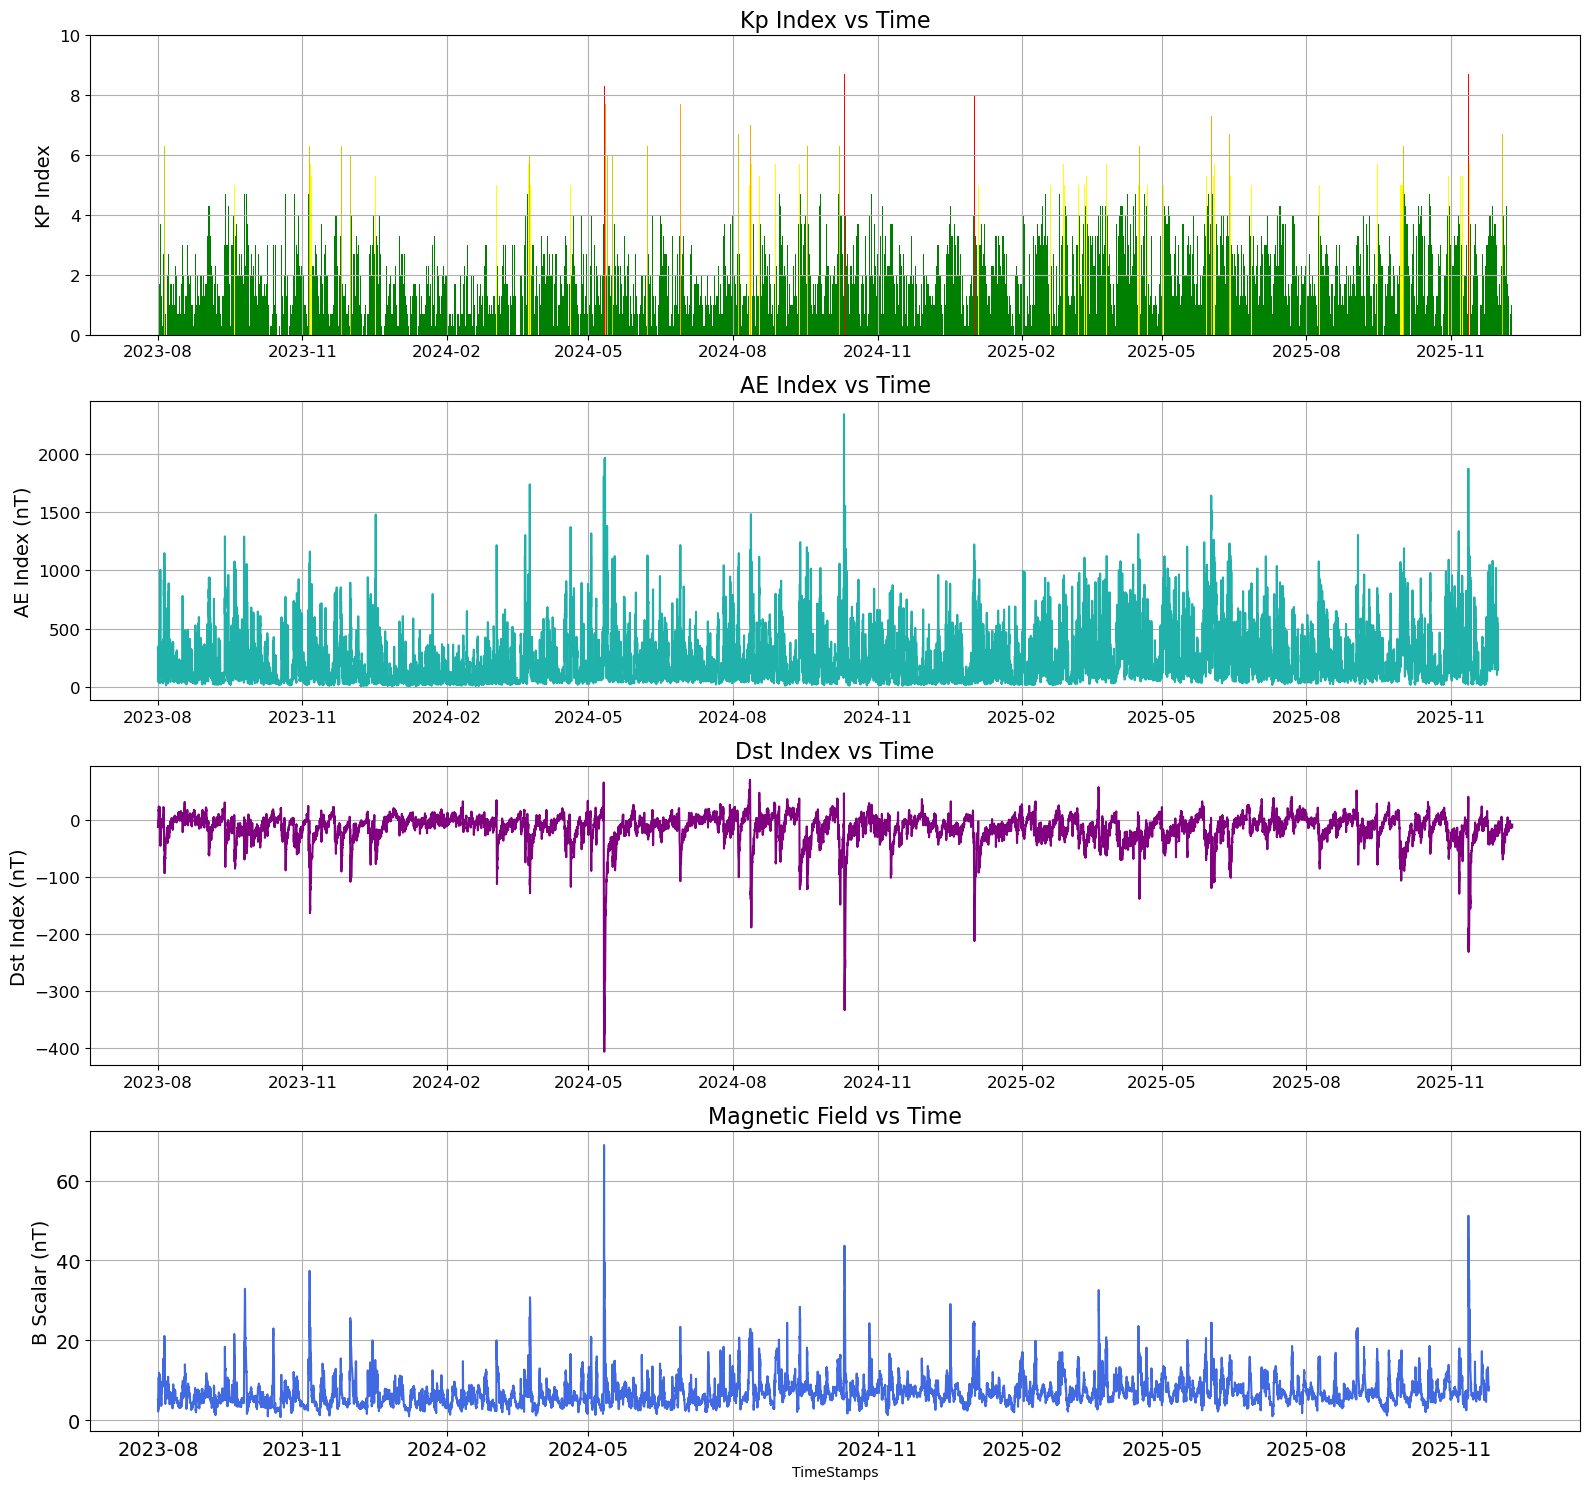

In [8]:
# ALL of 2023 end - 2025 (now) data
omni_data = omni_hr # Just for plotting GM Data
start_dt = "2023-08-01"
end_dt   = "2025-12-10"

x_tick_vals   = pd.date_range(start=start_dt, end=end_dt, freq="3MS")
x_tick_labels = x_tick_vals.strftime("%Y-%m")

GMActivity_range(omni_data,start_dt,end_dt,x_tick_vals,x_tick_labels,save_fig_str="")

### ADDING IN LOCAL SUNRISE SUNSET DARK INFO 

In [58]:
import ephem
from itertools import groupby
from collections import defaultdict

In [59]:
df_full = omni_hr.copy()

LAT = '62.52'
LON = '-114.31'
DARK_LIMIT = ephem.degrees('-15')
observer = ephem.Observer()
observer.lat = LAT
observer.lon = LON

df_full["TimeStamps"] = pd.to_datetime(df_full["TimeStamps"], utc=True)

In [60]:
def fully_dark(ts):
    observer.date = ts
    sun = ephem.Sun(observer)
    return sun.alt < DARK_LIMIT

df_full["is_dark"] = df_full["TimeStamps"].apply(fully_dark)
df_full

,Year,DOY,Hour,"Scalar B, nT",Kp*10 index,"Dst-index, nT","AE-index, nT",TimeStamps,Kp Index,Color,date,is_dark
0,2023,213,0,5.2,20,-12,326.0,2023-08-01 00:00:00+00:00,2.0,green,2023-08-01,False
1,2023,213,1,5.3,20,-11,346.0,2023-08-01 01:00:00+00:00,2.0,green,2023-08-01,False
2,2023,213,2,5.3,20,-9,261.0,2023-08-01 02:00:00+00:00,2.0,green,2023-08-01,False
3,2023,213,3,3.6,17,-5,156.0,2023-08-01 03:00:00+00:00,1.7,green,2023-08-01,False
4,2023,213,4,2.2,17,-1,58.0,2023-08-01 04:00:00+00:00,1.7,green,2023-08-01,False
...,...,...,...,...,...,...,...,...,...,...,...,...
20683,2025,343,19,NaN,13,-10,NaN,2025-12-09 19:00:00+00:00,1.3,green,2025-12-09,False
20684,2025,343,20,NaN,13,-13,NaN,2025-12-09 20:00:00+00:00,1.3,green,2025-12-09,False
20685,2025,343,21,NaN,13,-13,NaN,2025-12-09 21:00:00+00:00,1.3,green,2025-12-09,False
20686,2025,343,22,NaN,13,-11,NaN,2025-12-09 22:00:00+00:00,1.3,green,2025-12-09,False


### ADDING IN GM INFO

In [73]:
elev_kp = df_full[(df_full['Kp Index'] >= 7) | (omni_hr['Color'] == 'orange')]
elev_kp_times = elev_kp['TimeStamps'].tolist()
elev_kp_times

[Timestamp('2023-11-05 15:00:00+0000', tz='UTC'),
 Timestamp('2023-11-05 16:00:00+0000', tz='UTC'),
 Timestamp('2023-11-05 17:00:00+0000', tz='UTC'),
 Timestamp('2024-03-24 15:00:00+0000', tz='UTC'),
 Timestamp('2024-03-24 16:00:00+0000', tz='UTC'),
 Timestamp('2024-03-24 17:00:00+0000', tz='UTC'),
 Timestamp('2024-04-19 18:00:00+0000', tz='UTC'),
 Timestamp('2024-04-19 19:00:00+0000', tz='UTC'),
 Timestamp('2024-04-19 20:00:00+0000', tz='UTC'),
 Timestamp('2024-05-10 15:00:00+0000', tz='UTC'),
 Timestamp('2024-05-10 16:00:00+0000', tz='UTC'),
 Timestamp('2024-05-10 17:00:00+0000', tz='UTC'),
 Timestamp('2024-05-10 18:00:00+0000', tz='UTC'),
 Timestamp('2024-05-10 19:00:00+0000', tz='UTC'),
 Timestamp('2024-05-10 20:00:00+0000', tz='UTC'),
 Timestamp('2024-05-10 21:00:00+0000', tz='UTC'),
 Timestamp('2024-05-10 22:00:00+0000', tz='UTC'),
 Timestamp('2024-05-10 23:00:00+0000', tz='UTC'),
 Timestamp('2024-05-11 00:00:00+0000', tz='UTC'),
 Timestamp('2024-05-11 01:00:00+0000', tz='UTC'),


In [74]:
daily_ranges = defaultdict(list)
times_sorted = sorted(elev_kp_times)
for date, group in groupby(times_sorted, key=lambda x: x.date()):
    hours = sorted([ts.hour for ts in group])
    
    # Collapse consecutive hours into ranges
    ranges = []
    for k, g in groupby(enumerate(hours), lambda ix: ix[0] - ix[1]):
        group_hours = list(map(lambda x: x[1], g))
        ranges.append((group_hours[0], group_hours[-1]))
    
    daily_ranges[date] = ranges

slay for ae jumps!

In [75]:
AE_threshold = 1000  # nT, adjust as needed

large_ae = omni_hr[omni_hr['AE-index, nT'] >= AE_threshold]
ae_times_sorted = sorted(large_ae['TimeStamps'])

daily_ae_ranges = defaultdict(list)

for date, group in groupby(ae_times_sorted, key=lambda x: x.date()):
    hours = sorted([ts.hour for ts in group])
    ranges = []
    for k, g in groupby(enumerate(hours), lambda ix: ix[0] - ix[1]):
        group_hours = list(map(lambda x: x[1], g))
        ranges.append((group_hours[0], group_hours[-1]))
    
    daily_ae_ranges[date] = ranges

for day, ranges in daily_ae_ranges.items():
    day_str = day.strftime('%Y-%m-%d')
    range_strs = []
    for start, end in ranges:
        if start == end:
            range_strs.append(f"{start:02d}h")
        else:
            range_strs.append(f"{start:02d}h–{end:02d}h")

now for large negative changes in dSt!

In [76]:
# Define threshold for large negative Dst
Dst_threshold = -80  # nT, adjust as needed
large_neg_dst = omni_hr[omni_hr['Dst-index, nT'] <= Dst_threshold]
dst_times_sorted = sorted(large_neg_dst['TimeStamps'])

daily_dst_ranges = defaultdict(list)
for date, group in groupby(dst_times_sorted, key=lambda x: x.date()):
    hours = sorted([ts.hour for ts in group])
    ranges = []
    for k, g in groupby(enumerate(hours), lambda ix: ix[0] - ix[1]):
        group_hours = list(map(lambda x: x[1], g))
        ranges.append((group_hours[0], group_hours[-1]))
    
    daily_dst_ranges[date] = ranges

for day, ranges in daily_dst_ranges.items():
    day_str = day.strftime('%Y-%m-%d')
    range_strs = []
    for start, end in ranges:
        if start == end:
            range_strs.append(f"{start:02d}h")
        else:
            range_strs.append(f"{start:02d}h–{end:02d}h")
    print(f"{day_str}: {' , '.join(range_strs)}")

2023-08-05: 05h–06h
2023-09-12: 22h
2023-09-19: 02h , 04h
2023-10-21: 06h–08h
2023-11-05: 11h , 16h–23h
2023-11-06: 00h–13h
2023-11-25: 18h–19h , 22h
2023-12-01: 11h–18h , 21h–23h
2023-12-02: 00h–05h
2024-03-03: 17h–23h
2024-03-04: 00h
2024-03-24: 16h–23h
2024-03-25: 00h–01h
2024-04-19: 17h–23h
2024-05-02: 18h–20h
2024-05-10: 19h–23h
2024-05-11: 00h–23h
2024-05-12: 00h–19h , 22h–23h
2024-05-13: 02h–06h
2024-05-16: 10h
2024-05-17: 20h , 22h–23h
2024-05-18: 00h–01h
2024-06-28: 12h–13h
2024-08-04: 15h–20h
2024-08-12: 04h–23h
2024-08-13: 00h–05h
2024-09-12: 10h–16h , 18h–23h
2024-09-13: 00h–10h
2024-09-17: 02h–19h
2024-10-07: 20h–21h
2024-10-08: 00h–13h
2024-10-09: 05h
2024-10-10: 18h–23h
2024-10-11: 00h–22h
2024-11-09: 11h–18h
2025-01-01: 12h–23h
2025-01-02: 00h–18h
2025-01-04: 09h–10h , 21h–23h
2025-01-05: 00h
2025-04-16: 14h–23h
2025-06-01: 09h–16h , 20h
2025-06-02: 09h–19h , 22h–23h
2025-06-03: 04h–14h
2025-06-12: 23h
2025-06-13: 02h–23h
2025-08-09: 10h
2025-09-29: 17h–19h
2025-09-30: 

In [77]:
all_times = (
    set(elev_kp_times)
    | set(large_ae["TimeStamps"])
    | set(large_neg_dst["TimeStamps"])
)

# enforce darkness 
dark_times = set(df_full.loc[df_full["is_dark"], "TimeStamps"])
all_times = sorted(all_times & dark_times)


daily_activity = defaultdict(list)
daily_timestamps = defaultdict(list)

for date, group in groupby(all_times, key=lambda x: x.date()):
    group_list = list(group)
    daily_timestamps[date] = group_list

    hours = sorted(ts.hour for ts in group_list)
    ranges = []

    for _, g in groupby(enumerate(hours), lambda ix: ix[0] - ix[1]):
        h = [x[1] for x in g]
        ranges.append(f"{h[0]:02d}h" if h[0] == h[-1] else f"{h[0]:02d}h–{h[-1]:02d}h")

    daily_activity[date] = ", ".join(ranges)


activity_df = pd.DataFrame({
    "Date": [d.strftime("%Y-%m-%d") for d in daily_activity],
    "Active Hours (UTC)": list(daily_activity.values()),
    "Original Timestamps": list(daily_timestamps.values())}).set_index("Date")
activity_df

,Active Hours (UTC),Original Timestamps
Date,,
2024-09-17,05h,[2024-09-17 05:00:00+00:00]
2024-10-08,03h–05h,"[2024-10-08 03:00:00+00:00, 2024-10-08 04:00:0..."
2024-10-11,03h–11h,"[2024-10-11 03:00:00+00:00, 2024-10-11 04:00:0..."
2025-09-30,04h–05h,"[2025-09-30 04:00:00+00:00, 2025-09-30 05:00:0..."
2025-11-12,02h–11h,"[2025-11-12 02:00:00+00:00, 2025-11-12 03:00:0..."
2025-11-13,03h–05h,"[2025-11-13 03:00:00+00:00, 2025-11-13 04:00:0..."
